# Principal Component Analysis
Dimensionality Reduction Technique - Step by Step Approach

by: Ashwini Sarode

Code Like A Girl site: https://code.likeagirl.io/principal-component-analysis-dimensionality-reduction-technique-step-by-step-approach-ffd46623ff67

## Import the required libraries

In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

## Let’s first read the data set and store it in a data frame

In [2]:
file_name = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(file_name, sep=',',header=None)
df.head(n=10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


If the loading step above fails for whatever reason, you can load the data from the SciKit Learn packaged data

Putting Iris data & target together to recreate the dataset from CodeLikeAGirl

(this step is not necessary for this demo)

## Extract the last column (class label column)

In [3]:
class_label = pd.DataFrame(df.iloc[:,-1])
class_label.columns = ['label']
df = df.iloc[:, :-1]
df.head(n=10)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Normalizing the data

In [4]:
df = df.sub(df.mean(axis=0), axis=1)

In [5]:
df.head()

,0,1,2,3
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667


## Calculating covariance

In [6]:
df_mat = np.asmatrix(df)
sigma = np.cov(df_mat.T)

In [7]:
sigma

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

## Finding eigen values and eigen vectors

In [8]:
eigVals, eigVec = np.linalg.eig(sigma)

In [9]:
eigVals

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [10]:
eigVec

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

## Sort the eigen values and eigen vectors

In [11]:
sorted_index = eigVals.argsort()[::-1] 
eigVals = eigVals[sorted_index]
eigVec = eigVec[:,sorted_index]

In [12]:
eigVals

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

In [13]:
eigVec

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

## Select top k eigen values and corresponding eigen vectors

In [14]:
k = 2
eigVec = eigVec[:,:k]

In [15]:
eigVec

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

## Forming the new data set in reduced dimensions

In [16]:
transformed = df_mat.dot(eigVec)

In [17]:
#horizontally stack transformed data set with class label.
final_df = np.hstack((transformed, class_label))
#convert the numpy array to data frame
final_df = pd.DataFrame(final_df)
#define the column names
final_df.columns = ['x','y','label']

In [18]:
final_df.head()

,x,y,label
0,-2.68421,-0.326607,Iris-setosa
1,-2.71539,0.169557,Iris-setosa
2,-2.88982,0.137346,Iris-setosa
3,-2.74644,0.311124,Iris-setosa
4,-2.72859,-0.333925,Iris-setosa


## Plot the new data set

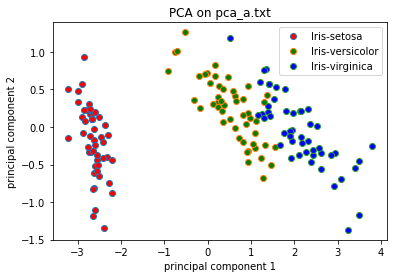

In [19]:
groups = final_df.groupby('label')
figure, axes = plt.subplots()
axes.margins(0.05)
# default colors used in original are not color-blind friendly
# adding specific colors helps those who are color-blind
mc = 'rgbk'
i = 0
for name, group in groups:
    axes.plot(group.x, group.y, \
        marker='o', linestyle='', ms=6, label=name, markerfacecolor=mc[i])
    i += 1
    axes.set_title("PCA on pca_a.txt")
axes.legend()
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

## Happy coding!
(here this notebook is again...from the author!)

https://github.com/AshwiniRS/Medium_Notebooks/blob/master/PCA/PCA_Iris_DataSet.ipynb